In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [55]:
df = pd.read_excel("Sample - Superstore.xls")

In [56]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

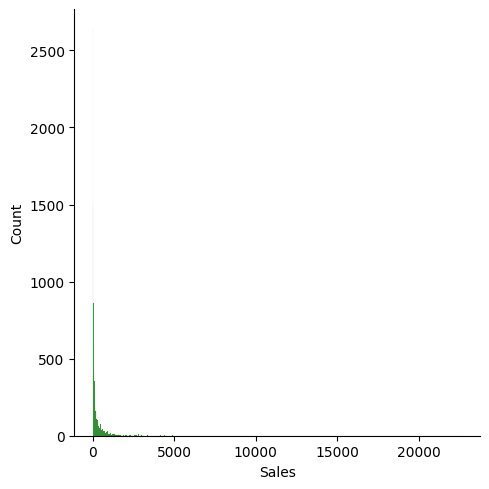

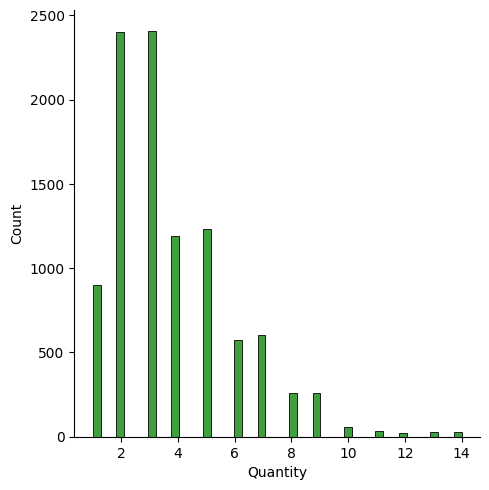

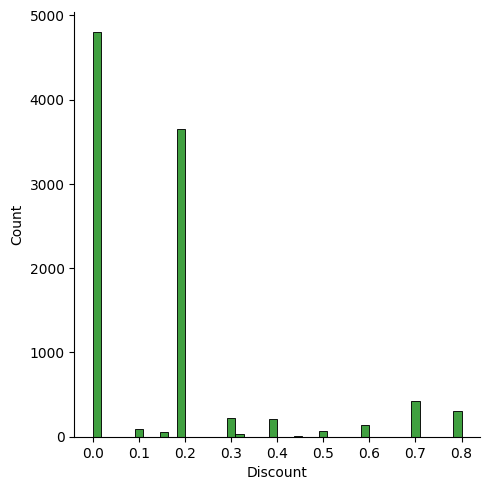

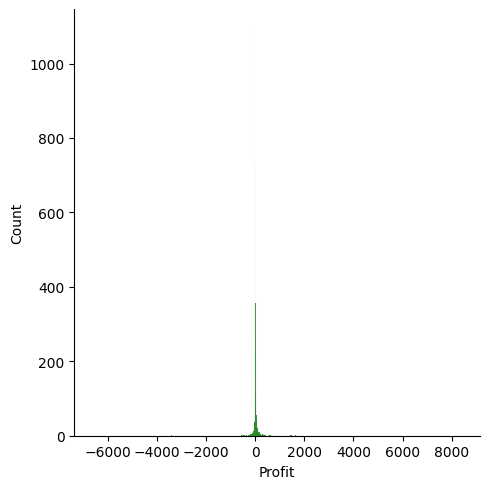

In [58]:
fechars_continuous = ['Sales','Quantity','Discount','Profit']
for i in fechars_continuous:
    sns.displot(data=df,x=i,color='g')

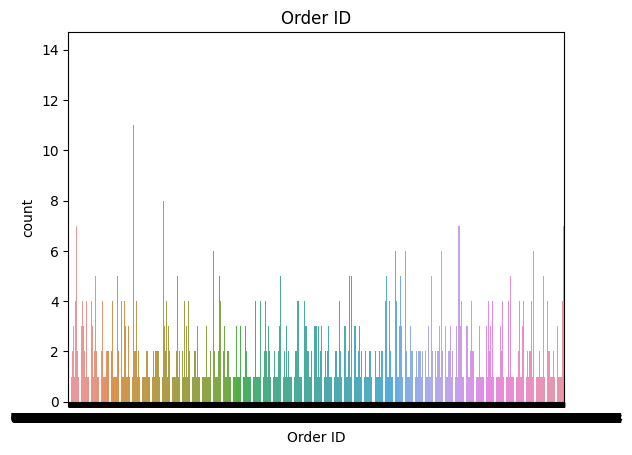

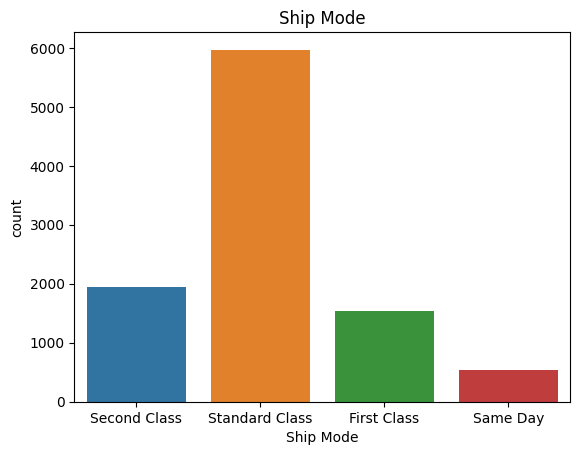

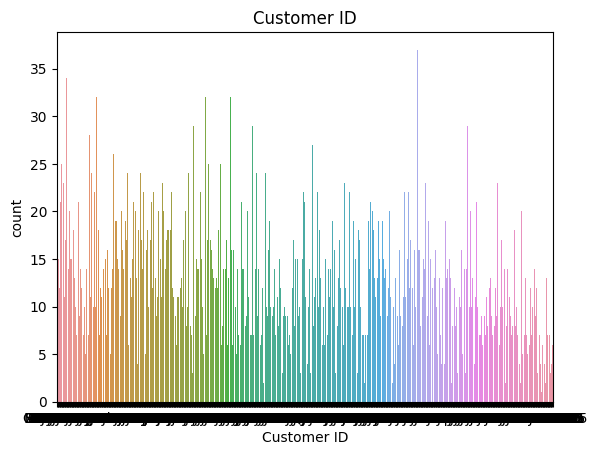

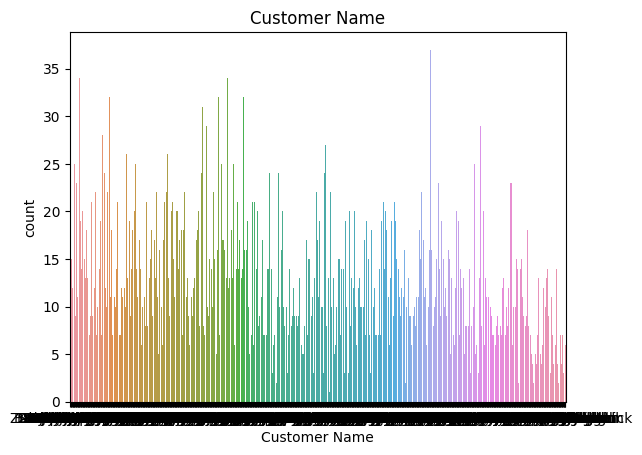

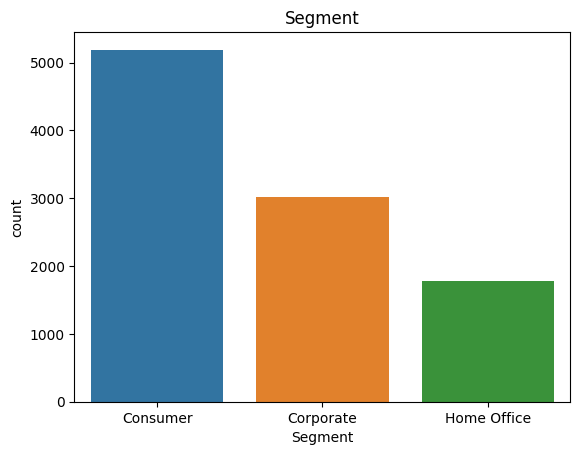

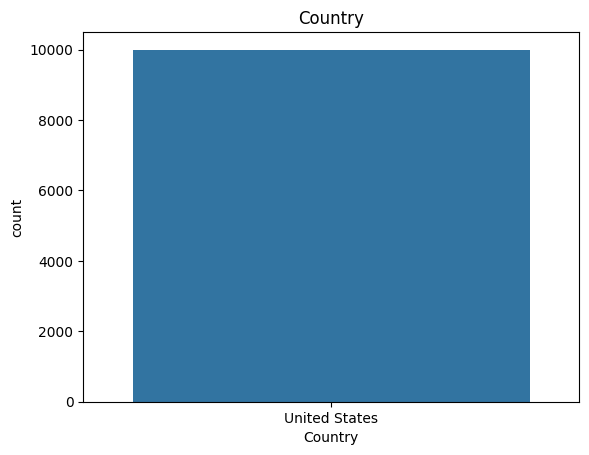

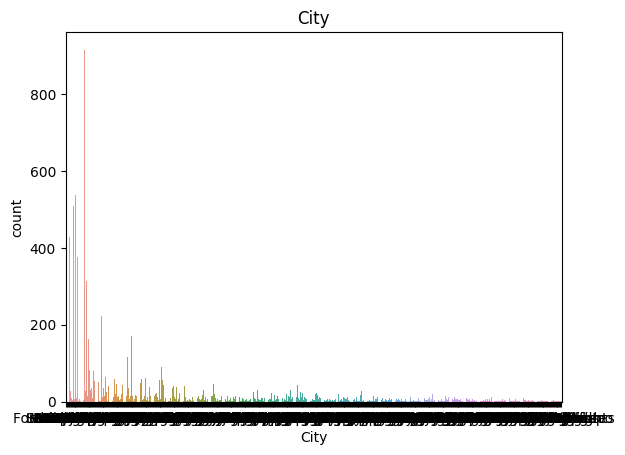

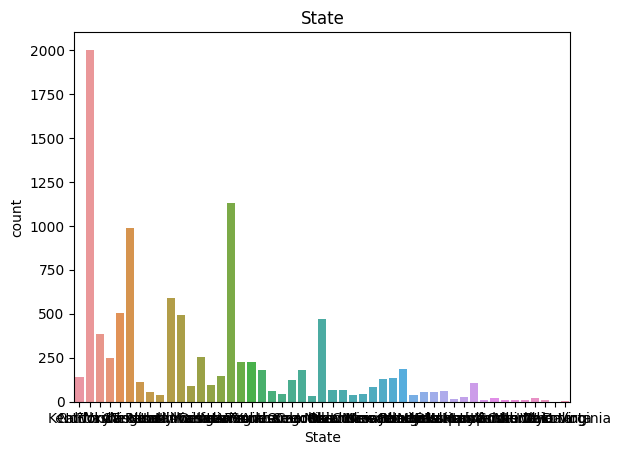

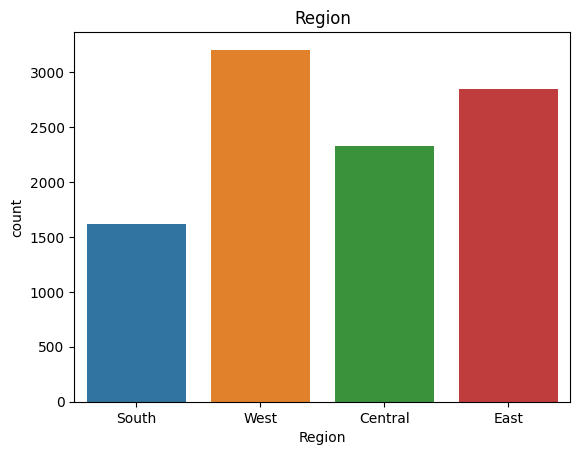

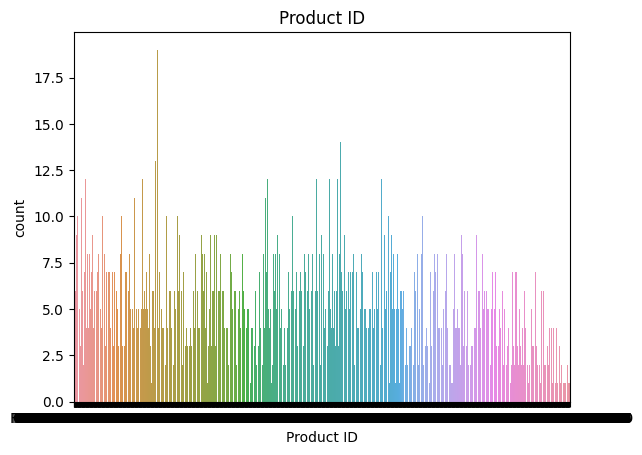

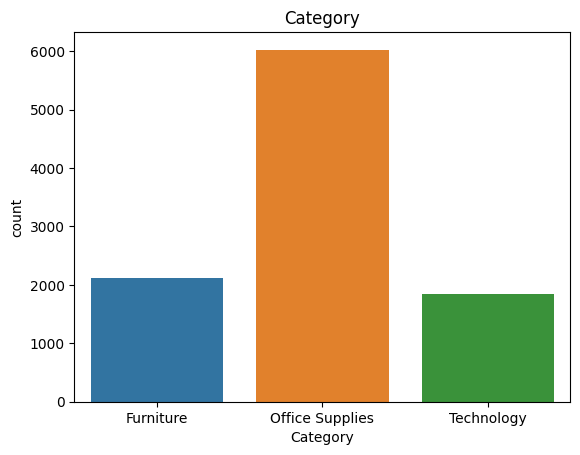

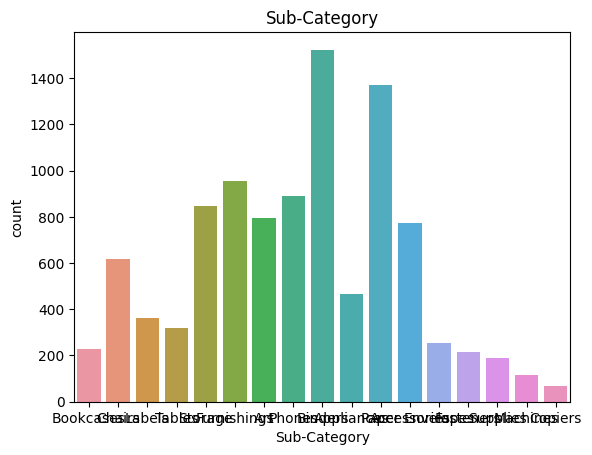

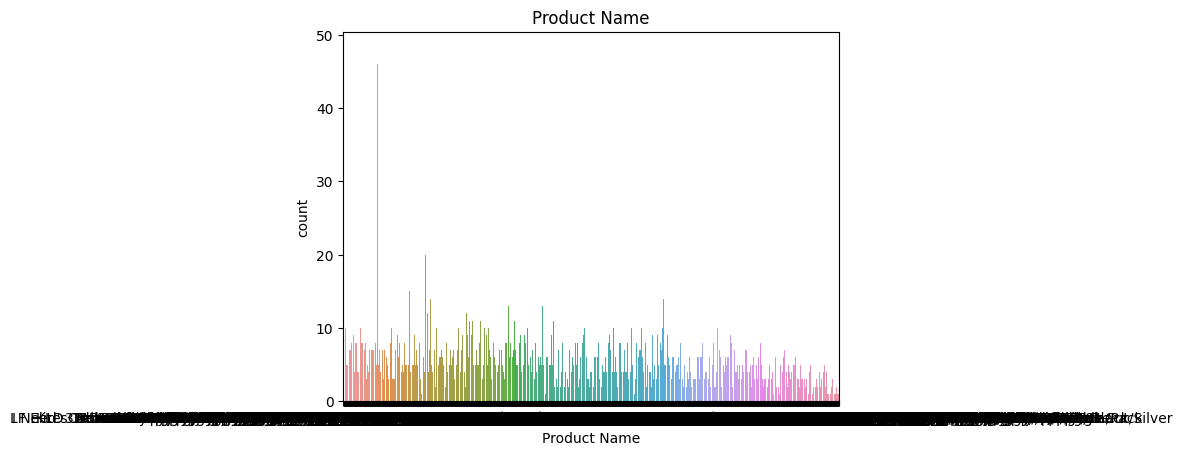

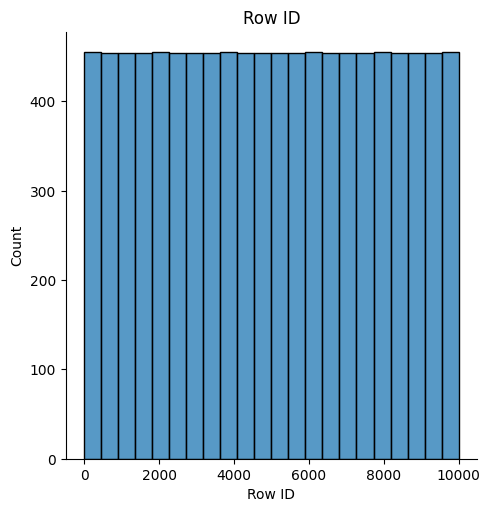

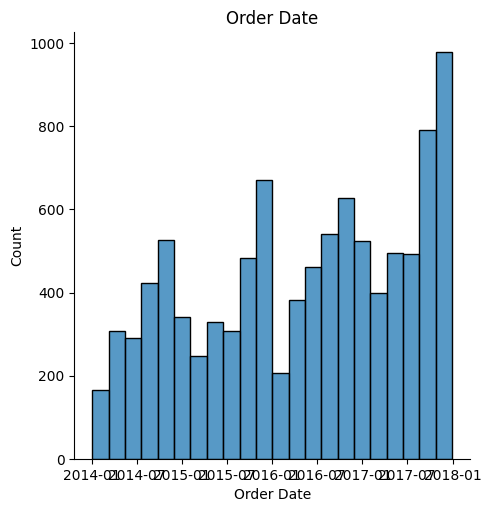

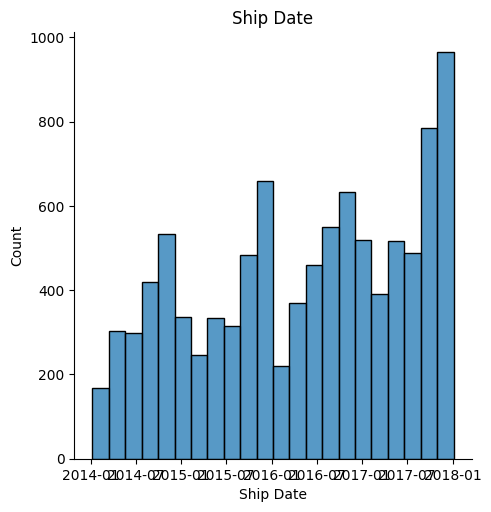

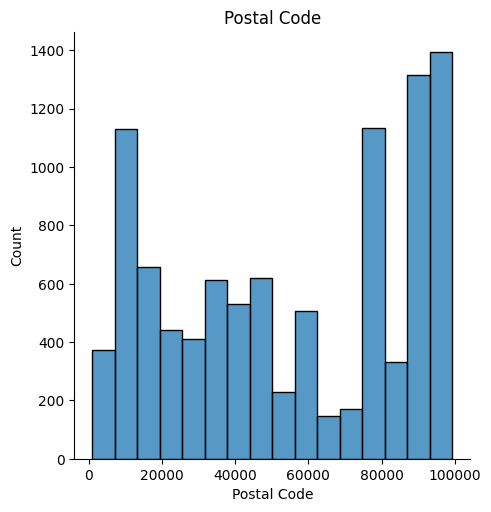

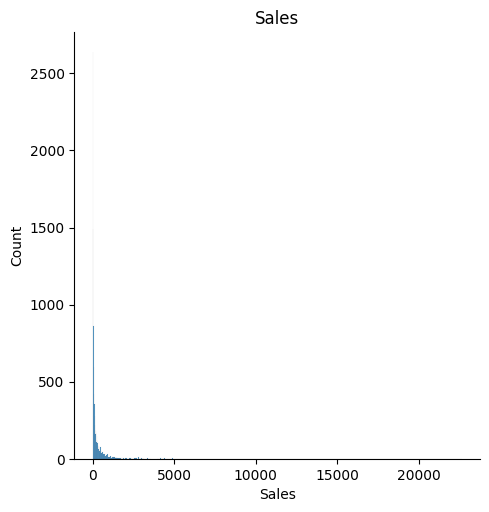

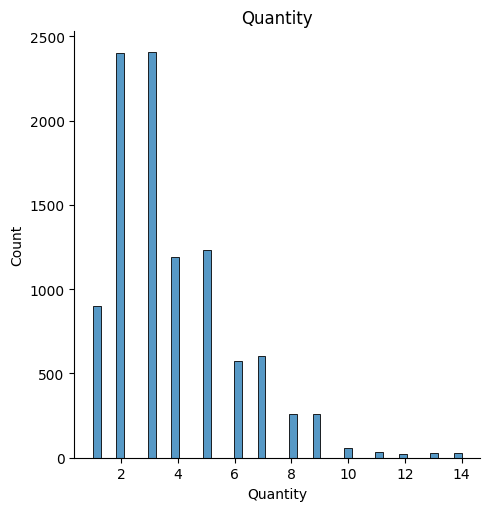

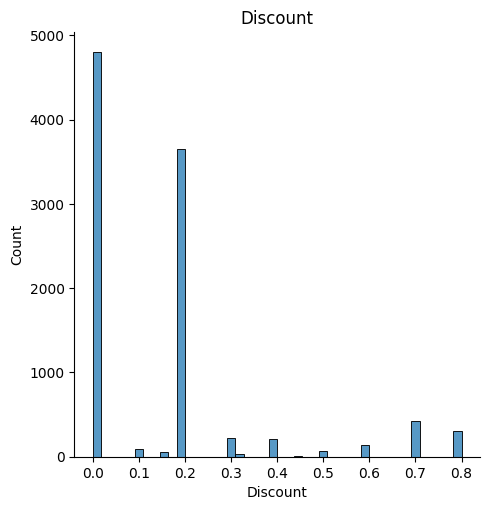

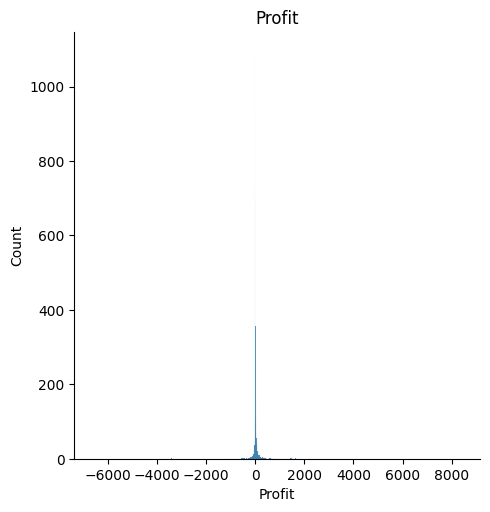

In [59]:
# Define separate lists for categorical and continuous columns
categorical_cols = [col for col in df.columns if df[col].dtype == object]
continuous_cols = [col for col in df.columns if col not in categorical_cols]

# Function to create the plot (replace 'kind' with desired plot type)
def create_plot(col, kind="hist"):  # Choose an appropriate default kind (e.g., hist, kde, ecdf)
  if col in categorical_cols:
    sns.countplot(x=col, data=df)  # Count plot for categorical variables
  else:
    sns.displot(x=col, data=df, kind=kind)  # Distribution plot for continuous variables
  plt.title(col)
  plt.show()

# Loop through columns and create plots
for col in categorical_cols + continuous_cols:
  create_plot(col)

In [60]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [61]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


<Axes: xlabel='Segment', ylabel='Sales'>

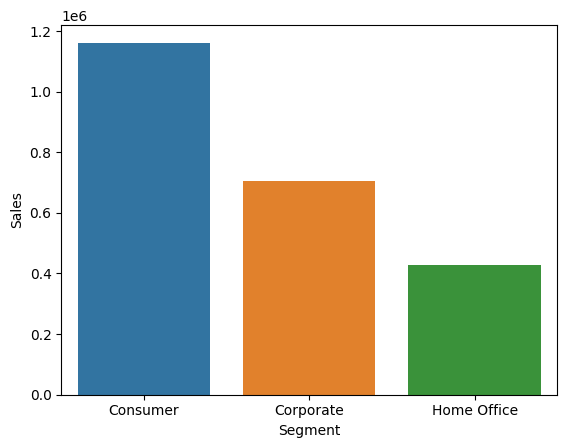

In [62]:
# Group the data by 'Segment' and calculate the sum of 'Sales'
df_grouped = df.groupby('Segment')['Sales'].sum()
# Create the barplot using the grouped data
sns.barplot(x=df_grouped.index, y=df_grouped)

In [63]:
df_grouped

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

In [64]:
df.groupby('Segment')['Sales'].count()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Sales, dtype: int64

In [65]:
df.groupby('Segment')['Sales'].mean()

Segment
Consumer       223.733644
Corporate      233.823300
Home Office    240.972041
Name: Sales, dtype: float64

In [66]:
df.groupby('Segment')['Sales'].var()

Segment
Consumer       342829.191093
Corporate      359292.837157
Home Office    570804.998449
Name: Sales, dtype: float64

In [67]:
df.groupby('Segment')['Sales'].median()

Segment
Consumer       53.72
Corporate      56.54
Home Office    52.44
Name: Sales, dtype: float64

<Axes: xlabel='State', ylabel='Sales'>

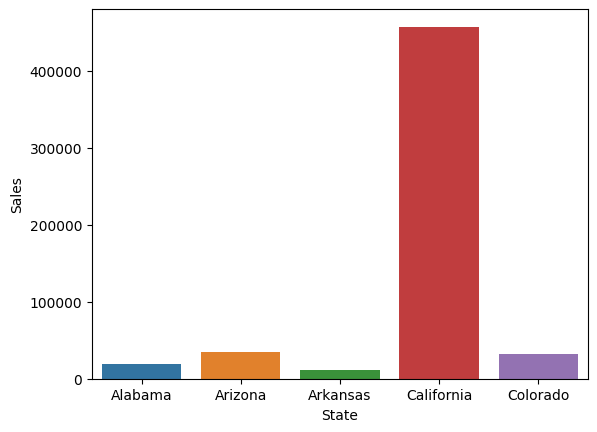

In [68]:
df_grouped = df.groupby('State')['Sales'].sum().head()
sns.barplot(x=df_grouped.index, y=df_grouped)

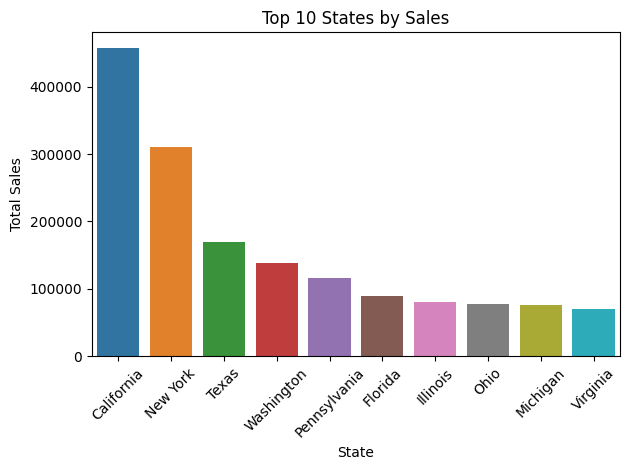

In [69]:
# Group the data by 'State' and sort by 'Sales' (descending)
df_grouped = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

# Create the barplot using the top 10 states
sns.barplot(x=df_grouped.index, y=df_grouped.values)

# Customize (optional)
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Top 10 States by Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()

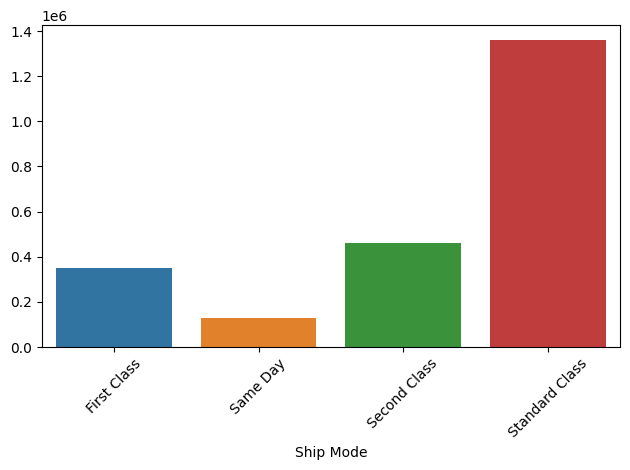

In [70]:
# Group the data by 'State' and sort by 'Sales' (descending)
df_grouped = df.groupby('Ship Mode')['Sales'].sum()

# Create the barplot using the top 10 states
sns.barplot(x=df_grouped.index, y=df_grouped.values)


plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()

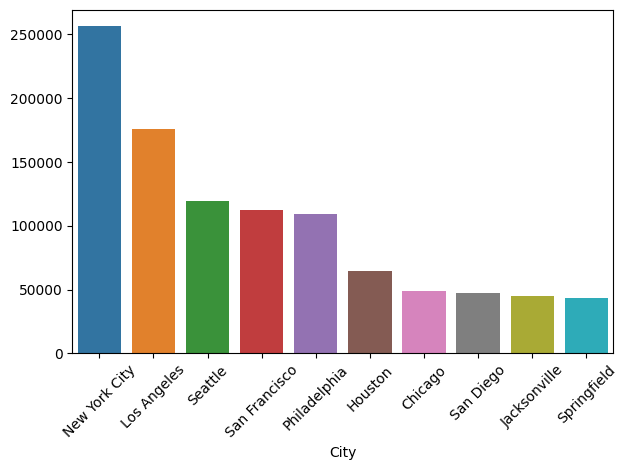

In [71]:
# Group the data by 'State' and sort by 'Sales' (descending)
df_grouped = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

# Create the barplot using the top 10 states
sns.barplot(x=df_grouped.index, y=df_grouped.values)

# Customize (optional)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()

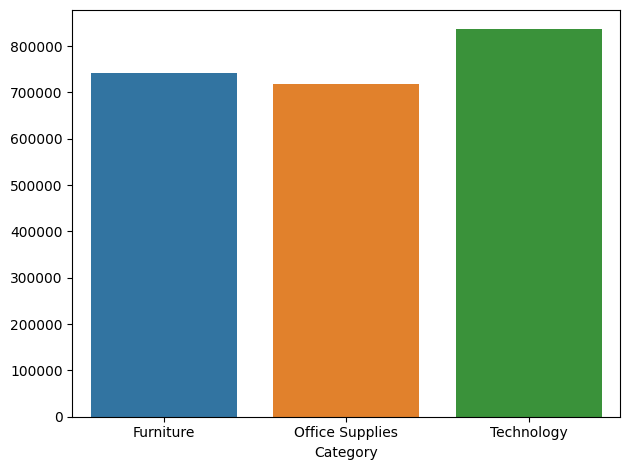

In [72]:
# Group the data by 'State' and sort by 'Sales' (descending)
df_grouped = df.groupby('Category')['Sales'].sum()

# Create the barplot using the top 10 states
sns.barplot(x=df_grouped.index, y=df_grouped.values)

# Customize (optional)

plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()

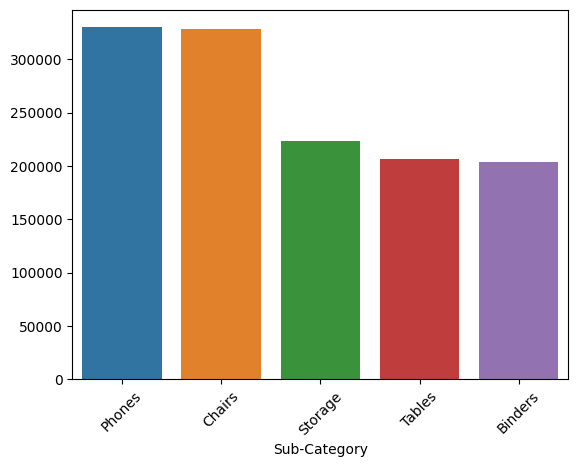

In [73]:
# Group the data by 'State' and sort by 'Sales' (descending)
df_grouped = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)

# Create the barplot using the top 10 states
sns.barplot(x=df_grouped.index, y=df_grouped.values)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()